In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [2]:
# Cargando dataset
file_path = 'dataset/anaemia.csv' 
df = pd.read_csv(file_path)

In [3]:
# Eliminando espacios en blanco en la columna Sex
df['Sex'] = df['Sex'].str.strip()

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])

df['Anaemic'] = encoder.fit_transform(df['Anaemic'])

In [4]:
# Seleccionando  variables independientes y variable objetivo
X = df[['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y = df['Anaemic']

In [5]:
# Separando los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

In [6]:
# Creando modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=314)

# Escalando datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Entrenando modelo
random_forest_model.fit(X_train_scaled, y_train)

# Prediciendo valores
y_pred = random_forest_model.predict(X_test_scaled)

In [7]:
# Evaluando modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

[[25  0]
 [ 0  7]]


In [8]:
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Recall: 1.00
Precision: 1.00
F1 Score: 1.0


In [9]:
kfold = KFold(n_splits=5, shuffle=True, random_state=314)

results = cross_val_score(random_forest_model, X, y, cv=kfold, scoring='accuracy')
print(f"Accuracy: {results.mean():.2f} (+/- {results.std():.2f})")

Accuracy: 0.96 (+/- 0.04)


# Analisis SHAP

In [10]:
import seaborn as sns
import shap
import numpy as np
shap.initjs()

In [11]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = np.array(explainer.shap_values(X_train_scaled))
shap_values.shape

(72, 6, 2)

In [12]:
shap_values_ = shap_values.transpose(2, 0, 1)
shap_values_.shape

(2, 72, 6)

## SHAP Summary Plot

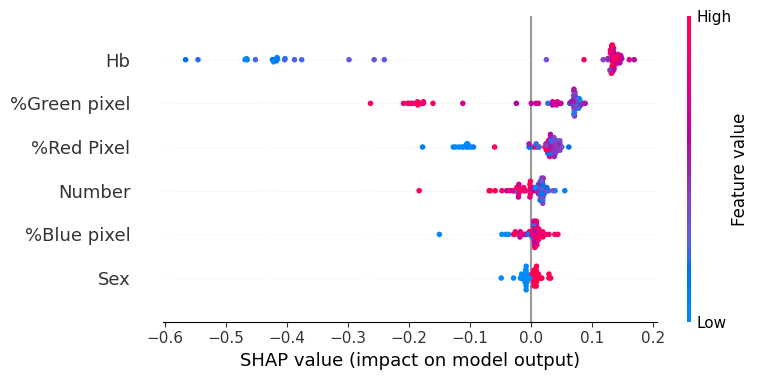

In [13]:
shap.summary_plot(shap_values_[0],X_train_scaled)


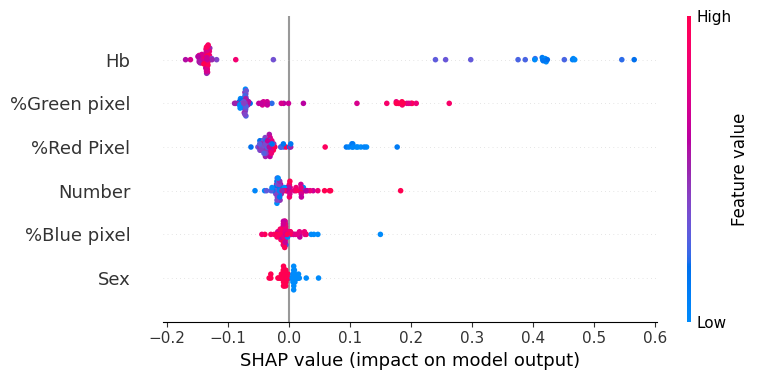

In [14]:
shap.summary_plot(shap_values_[1],X_train_scaled)


## SHAP Dependence Plots

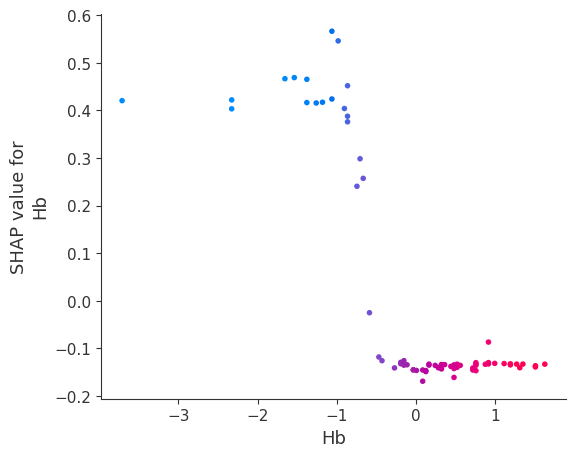

In [15]:
# SHAP dependence plot - Analizando como la variable Hb afecta a la predicción del modelo
shap.dependence_plot('Hb', shap_values_[1], X_train_scaled, interaction_index='Hb')

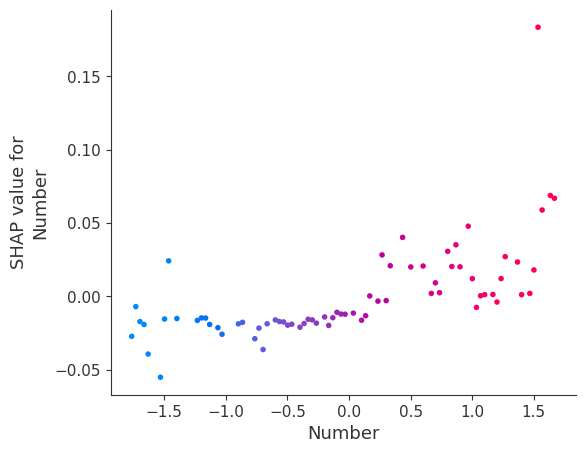

In [16]:
# SHAP dependence plot - Analizando como la variable Number afecta a la predicción del modelo
shap.dependence_plot('Number', shap_values_[1], X_train_scaled, interaction_index='Number')

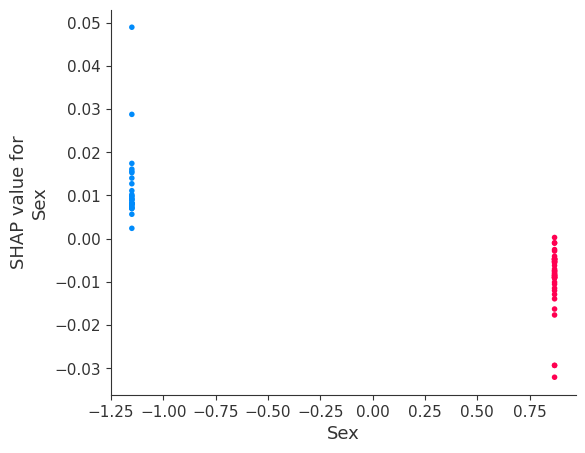

In [17]:
# SHAP dependence plot - Analizando como la variable Sex afecta a la predicción del modelo
shap.dependence_plot('Sex', shap_values_[1], X_train_scaled, interaction_index='Sex')

## SHAP Force Plots

In [18]:
# SHAP force plot - Analizando la predicción de un caso en particular
shap.force_plot(explainer.expected_value[1], shap_values_[1][0], X_train_scaled.iloc[0])

In [19]:
# SHAP force plot - Analizando la predicción de un caso en particular
shap.force_plot(explainer.expected_value[1], shap_values_[1][10], X_train_scaled.iloc[1])

In [20]:
# SHAP force plot - Analizando la predicción de un caso en particular
shap.force_plot(explainer.expected_value[1], shap_values_[1][20], X_train_scaled.iloc[2])

In [21]:
# SHAP force plot - Analizando la predicción de un caso en particular
shap.force_plot(explainer.expected_value[1], shap_values_[1][30], X_train_scaled.iloc[2])

In [22]:
# SHAP force plot

In [23]:
# SHAP force plot - Analizando la predicción de un caso en particular
shap.force_plot(explainer.expected_value[1], shap_values_[1][50], X_train_scaled.iloc[2])